In [7]:
import pandas as pd
df = pd.read_csv("C:/Users/USER/Desktop/BETKOT Municipality Program/YASH SLIDES/Class5_ML_Regressio_Classification/ML_Regression_Classification_Methods/diabetes.csv")
print(df.head())
print(df.tail())

   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1
     pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
763        10      101  76    48      180  32.9     0.171   63      0
764         2      122  70    27        0  36.8     0.340   27      0
765         5      121  72    23      112  26.2     0.245   30      0
766         1      126  60     0        0  30.1     0.349   47      1
767         1       93  70    31        0  30.4     0.315   23      0


In [11]:
feat_set = ['pregnant', 'glucose','bp', 'skin', 'insulin','bmi', 'pedigree', 'age']
x = df[feat_set]
#print(x.shape)
y = df.label
#print(y.shape)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(768, 8)
(768,)
(691, 8) (691,)
(77, 8) (77,)


In [15]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
print("Training completed..")
pred = model.predict(x_test)
print(pred)
print(y_test)

Training completed..
[0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1
 0 1 0]
402    1
148    0
740    1
222    0
151    0
      ..
352    0
598    1
85     0
584    1
410    0
Name: label, Length: 77, dtype: int64


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy", accuracy_score(y_test, pred))
print("Precision", precision_score(y_test, pred))
print("Recall", recall_score(y_test, pred))
print("F1-Measure", f1_score(y_test, pred))


Accuracy 0.7402597402597403
Precision 0.5925925925925926
Recall 0.64
F1-Measure 0.6153846153846154


In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[41, 11],
       [ 9, 16]], dtype=int64)

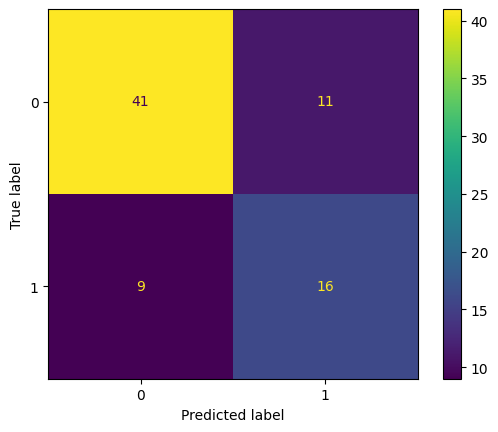

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,x_test,y_test)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        52
           1       0.59      0.64      0.62        25

    accuracy                           0.74        77
   macro avg       0.71      0.71      0.71        77
weighted avg       0.75      0.74      0.74        77



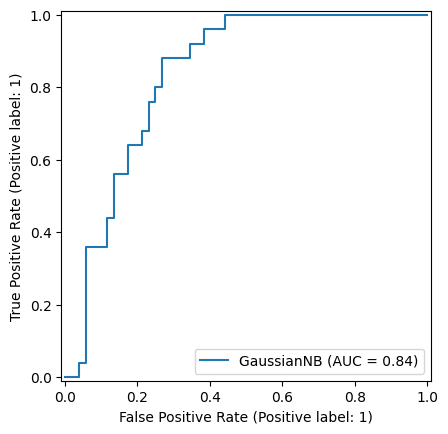

In [29]:
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model,x_test,y_test)

In [32]:
from sklearn.metrics import roc_auc_score
print("Area under the curve:", roc_auc_score(y_test, pred))

Area under the curve: 0.7142307692307693


In [33]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()